In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

In [3]:
x_train = "/content/drive/MyDrive/CS464_Spring_2023_HW1_data/x_train.csv"
y_train = "/content/drive/MyDrive/CS464_Spring_2023_HW1_data/y_train.csv"
x_test = "/content/drive/MyDrive/CS464_Spring_2023_HW1_data/x_test.csv"
y_test = "/content/drive/MyDrive/CS464_Spring_2023_HW1_data/y_test.csv"

In [4]:
y_train_dataframe = pd.read_csv(y_train, header = 0)
x_train_dataframe = pd.read_csv(x_train, header=0)
x_test_dataframe = pd.read_csv(x_test, header=0)
y_test_dataframe = pd.read_csv(y_test, header=0)

In [5]:
x_train_dataframe.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,2,5,2,0,2,0,24,1,0,4,...,0,0,0,0,0,0,0,0,0,0
1,18,15,2,1,4,14,120,5,0,15,...,0,0,0,0,0,0,0,0,2,0
2,2,0,1,1,2,2,12,2,0,3,...,0,0,0,0,0,0,0,0,1,0
3,26,31,2,13,12,23,222,1,0,65,...,0,0,0,0,5,0,0,0,0,0
4,1,1,1,2,0,0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train_dataframe.head()

,Prediction
0,0
1,0
2,1
3,1
4,1


In [7]:
number_of_spam = 0
number_of_ham = 0

for i in y_train_dataframe["Prediction"]:
  if i == 1:
    number_of_spam += 1
  else :
    number_of_ham+=1

In [9]:
print(number_of_spam)
print(number_of_ham)
print(100*(number_of_spam/(number_of_spam+number_of_ham)))

1183
2954
28.59560067681895


In [17]:
def create_dictionary_of_word_occurences(x_dataframe, y_dataframe):
  spam_words_dict = dict()
  ham_words_dict = dict()

  column_names = list(x_dataframe.columns)

  for word in column_names:
    spam_words_dict[word] = 0
    ham_words_dict[word] = 0



  for word in x_dataframe:
    for i, num in enumerate(x_dataframe[word]):

      if y_dataframe["Prediction"][i] == 1:
        spam_words_dict[word] += num
      else : 
          ham_words_dict[word] += num

  return spam_words_dict, ham_words_dict



In [48]:
def train(x_dataframe, y_dataframe):
  spam_words_dict, ham_words_dict = create_dictionary_of_word_occurences(x_train_dataframe, y_train_dataframe)
  print(spam_words_dict["the"])
  num_spam = y_train_dataframe['Prediction'].value_counts()[1]
  num_ham = y_train_dataframe['Prediction'].value_counts()[0]

  
  #priors
  p_spam = num_spam / (num_spam + num_ham)
  p_ham = num_ham / (num_spam + num_ham)

  tot_spam_words = sum(spam_words_dict.values())
  tot_ham_words =sum(ham_words_dict.values())


  #likelihoods

  for key in spam_words_dict:
    spam_words_dict[key] = spam_words_dict[key]/ tot_spam_words
  for key in ham_words_dict:
    ham_words_dict[key] = ham_words_dict[key]/ tot_ham_words
   
  return p_spam, p_ham, spam_words_dict, ham_words_dict

In [49]:
def test(p_spam, p_ham, spam_words_likely_dict, ham_words_likely_dict, x_dataframe_test, y_dataframe_test):



  column_names = list(x_dataframe_test.columns)
  results = np.zeros(y_test_dataframe.shape)

  for index, row in x_dataframe_test.iterrows():
    #print(f"Mail {index + 1}:")
    po_spam = np.log(p_spam)
    po_ham = np.log(p_ham)

    for ind_words, num_of_words in enumerate(row):
      for i in range(num_of_words):

        po_spam += np.log(spam_words_likely_dict[column_names[ind_words]])
        po_ham += np.log(ham_words_likely_dict[column_names[ind_words]])
        
    results[index] = (po_spam>po_ham)
    

  return results
      
        


In [50]:
a,b,c,d = train(y_train_dataframe, y_train_dataframe)


7711


In [21]:
results = test(a,b,c,d,x_test_dataframe, y_test_dataframe)


<ipython-input-19-ba83bd72c245>:16: RuntimeWarning: divide by zero encountered in log
  po_spam += np.log(spam_words_likely_dict[column_names[ind_words]])
<ipython-input-19-ba83bd72c245>:17: RuntimeWarning: divide by zero encountered in log
  po_ham += np.log(ham_words_likely_dict[column_names[ind_words]])


In [22]:
results

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [23]:
def calculate_accuracy(true_array, pred_array):

    
    num_correct = np.sum(true_array == pred_array)
    
    num_total = true_array.shape[0]
    
    accuracy = num_correct / num_total
    
    return accuracy

In [24]:

calculate_accuracy(results, y_test_dataframe.to_numpy())

0.9439613526570049

In [46]:
def train_dl(x_dataframe, y_dataframe):
  spam_words_dict, ham_words_dict = create_dictionary_of_word_occurences(x_dataframe, y_dataframe)

  spam_words_dict["the"]
  num_spam = y_train_dataframe['Prediction'].value_counts()[1]
  num_ham = y_train_dataframe['Prediction'].value_counts()[0]

  #priors
  p_spam = num_spam / (num_spam + num_ham)
  p_ham = num_ham / (num_spam + num_ham)

  tot_spam_words = sum(spam_words_dict.values())
  tot_ham_words =sum(ham_words_dict.values())
  
  #likelihoods
  alpha = 5 # Dirichlet prior of 5
  for key in spam_words_dict:
    spam_words_dict[key] = (spam_words_dict[key] + alpha) / (tot_spam_words + alpha*len(spam_words_dict))
  for key in ham_words_dict:
    ham_words_dict[key] = (ham_words_dict[key] + alpha) / (tot_ham_words + alpha*len(spam_words_dict))

  return p_spam, p_ham, spam_words_dict, ham_words_dict


In [51]:

p_spam_D, p_ham_D, spam_words_dict_D, ham_words_dict_D = train_dl(x_train_dataframe, y_train_dataframe)



In [52]:
results_d = test(p_spam_D, p_ham_D, spam_words_dict_D, ham_words_dict_D,x_test_dataframe, y_test_dataframe)


In [53]:
calculate_accuracy(results_d, y_test_dataframe.to_numpy())

0.9478260869565217

In [54]:
def create_dictionary_of_word_occurences_bnb(x_dataframe, y_dataframe):
  spam_words_dict = dict()
  ham_words_dict = dict()
  words_dict = dict()

  column_names = list(x_dataframe.columns)

  for word in column_names:
    words_dict[word] = 0
    spam_words_dict[word] = 0
    ham_words_dict[word] = 0



  for word in x_dataframe:
    for i, num in enumerate(x_dataframe[word]):

      if y_dataframe["Prediction"][i] == 1:
        spam_words_dict[word] += num > 0
      else : 
          ham_words_dict[word] += num>0

      words_dict[word] += 1
  return words_dict, spam_words_dict, ham_words_dict



In [55]:
def train_bnb(x_dataframe, y_dataframe):
  words_dict, spam_words_dict, ham_words_dict = create_dictionary_of_word_occurences_bnb(x_train_dataframe, y_train_dataframe)
  y_array = y_train_dataframe.to_numpy()

  num_spam = y_train_dataframe['Prediction'].value_counts()[1]
  num_ham = y_train_dataframe['Prediction'].value_counts()[0]

  
  #priors
  p_spam = num_spam / (num_spam + num_ham)
  p_ham = num_ham / (num_spam + num_ham)

  tot_spam_words = sum(spam_words_dict.values())
  tot_ham_words =sum(ham_words_dict.values())


  #likelihoods

  for key in spam_words_dict:
    spam_words_dict[key] = spam_words_dict[key]/ num_spam
  for key in ham_words_dict:
    ham_words_dict[key] = ham_words_dict[key]/ num_spam
   
  return p_spam, p_ham, spam_words_dict, ham_words_dict

In [56]:
p_spam_bnb, p_ham_bnb, spam_words_dict_bnb, ham_words_dict_bnb = train_bnb(y_train_dataframe, y_train_dataframe)


In [57]:
results_bnb = test(p_spam_bnb, p_ham_bnb, spam_words_dict_bnb, ham_words_dict_bnb, x_test_dataframe, y_test_dataframe)


<ipython-input-49-ba83bd72c245>:16: RuntimeWarning: divide by zero encountered in log
  po_spam += np.log(spam_words_likely_dict[column_names[ind_words]])
<ipython-input-49-ba83bd72c245>:17: RuntimeWarning: divide by zero encountered in log
  po_ham += np.log(ham_words_likely_dict[column_names[ind_words]])


In [58]:
calculate_accuracy(results_bnb, y_test_dataframe.to_numpy())

0.8405797101449275

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    # Create confusion matrix as a NumPy array
    labels = np.unique(np.concatenate((y_true, y_pred)))
    cm = np.zeros((len(labels), len(labels)))
    for i in range(len(y_true)):
        true_label_index = np.where(labels == y_true[i])[0][0]
        pred_label_index = np.where(labels == y_pred[i])[0][0]
        cm[true_label_index][pred_label_index] += 1

    # Create Seaborn heatmap of confusion matrix
    sns.set()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

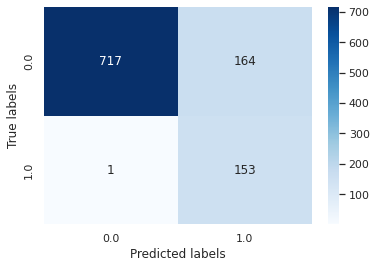

In [60]:


plot_confusion_matrix(results_bnb, y_test_dataframe.to_numpy())

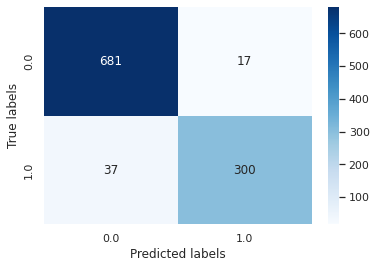

In [61]:
plot_confusion_matrix(results_d, y_test_dataframe.to_numpy())


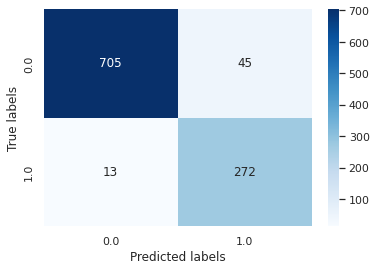

In [62]:
plot_confusion_matrix(results, y_test_dataframe.to_numpy())
